# Analysis

As stated in the portfolio, I expect the results below.
- The detected soil moisture should gradually decrease.
- The detected soil moisture should be <a href="https://www.mdpi.com/2073-4433/11/5/503">inversely related with temperature of the plant's environment</a>.

## Importing Data

In [1]:
import pandas as pd
df = pd.read_csv("resistive-sensor-clean.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.head()

,Timestamp,dMoisture,Cause_Temperature
0,2023-08-05 14:21:37,-0.005155,34.7
1,2023-08-05 14:21:47,-0.005155,34.7
2,2023-08-05 14:21:57,-0.005155,34.7
3,2023-08-05 14:22:11,-0.001289,34.7
4,2023-08-05 14:22:20,0.000000,34.6


In [2]:
df.describe()

,dMoisture,Cause_Temperature
count,4640.000000,4640.000000
mean,-0.002272,30.808341
std,0.001826,1.492293
min,-0.006443,29.100000
25%,-0.002577,29.800000
50%,-0.001289,30.500000
75%,-0.001289,31.000000
max,0.000000,38.500000


## Checking Assumptions

### Gradual Decrease

The first thing to check was the plot of `dMoisture`.

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Moisture 1 Hour Ago - Moisture when Recorded')

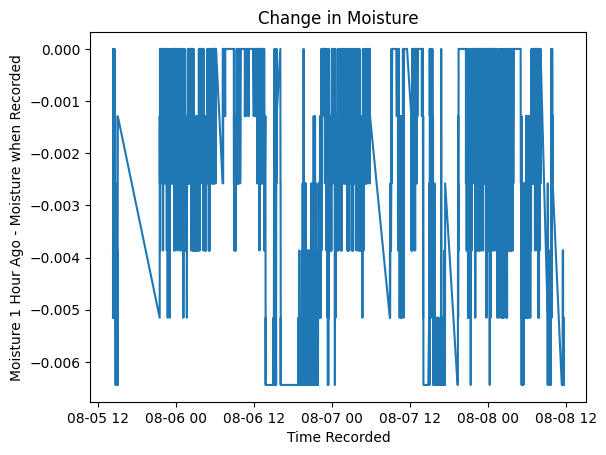

In [4]:
plt.plot(df["Timestamp"], df["dMoisture"])
plt.title("Change in Moisture")
plt.xlabel("Time Recorded")
plt.ylabel("Moisture 1 Hour Ago - Moisture when Recorded")

None of the values in the `dMoisture` column were above 0. However, the histogram below shows that there are more values with no change than with smal changes.

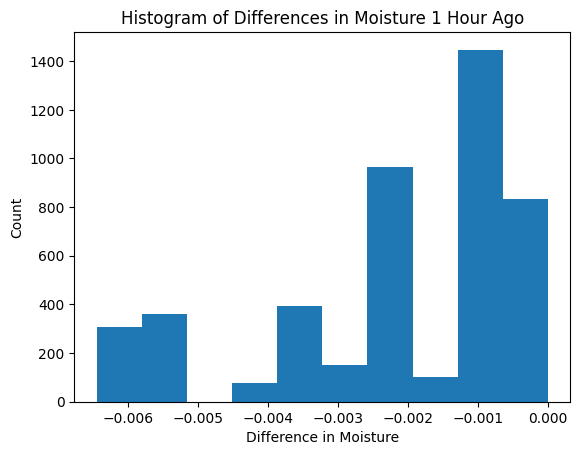

In [5]:
plt.hist(df["dMoisture"])
plt.title("Histogram of Differences in Moisture 1 Hour Ago")
plt.ylabel("Count")
plt.xlabel("Difference in Moisture")
plt.show()

Consequently, a statistical test was made to check for if the average difference in moisture can be less than 0%.

In [6]:
import scipy.stats as stats 

In [7]:
test_alpha = 0.05
dmoist_mean_test = stats.ttest_1samp(df["dMoisture"], popmean = 0, alternative = "less")
pd.DataFrame({
    "p-value": [dmoist_mean_test.pvalue],
    "alpha": [test_alpha],
    "conclusion": [ "Reject null hypothesis" if pval < test_alpha else "Do not reject null hypothesis" for pval in [dmoist_mean_test.pvalue] ]
})

,p-value,alpha,conclusion
0,0.0,0.05,Reject null hypothesis


Based on the statistical test above, it is safe to say that the values in the moisture sensor gradually decrease.

### Relationship between Soil Moisture and Temperature

First, temperature and the difference in humidity were plotted against each other in a scatterplot.

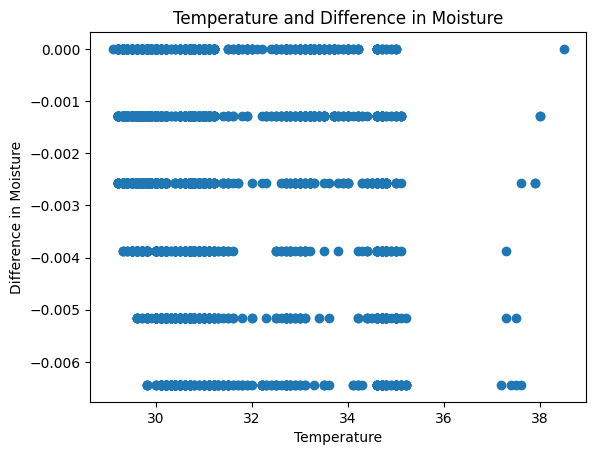

In [8]:
plt.scatter(df["Cause_Temperature"], df["dMoisture"])
plt.title("Temperature and Difference in Moisture")
plt.xlabel("Temperature")
plt.ylabel("Difference in Moisture")
plt.show()

The scatterplot showed many points when temperature was less than 36°C. However, there were many overlapping points in the previous graph. So, the differences in moisture were averaged and plotted again.

    Cause_Temperature  dMoisture
0                29.1   0.000000
1                29.2  -0.000925
2                29.3  -0.001218
3                29.4  -0.001641
4                29.5  -0.001706
..                ...        ...
65               37.5  -0.005799
66               37.6  -0.004510
67               37.9  -0.002577
68               38.0  -0.001289
69               38.5   0.000000

[70 rows x 2 columns]


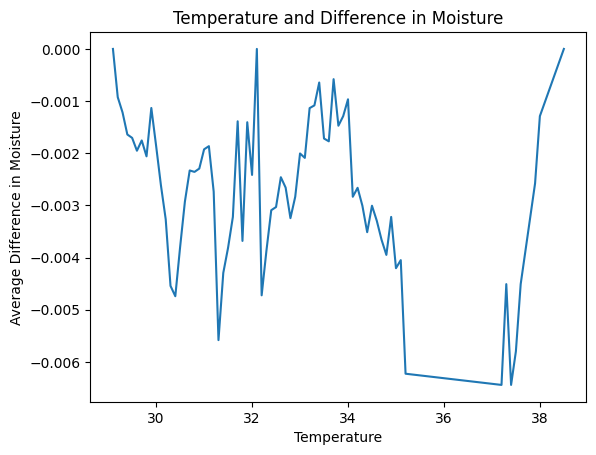

In [12]:
temp_vs_dMoist = df.groupby('Cause_Temperature', as_index=False)["dMoisture"].mean()
print(temp_vs_dMoist)
plt.plot(temp_vs_dMoist["Cause_Temperature"], temp_vs_dMoist["dMoisture"])
plt.title("Temperature and Difference in Moisture")
plt.xlabel("Temperature")
plt.ylabel("Average Difference in Moisture")
plt.show()

Based on the relationship, temperature and the difference in moisture are related. A statistical test was made to verify this finding further.

The statistical test below checks if the dataset has enough evidence to conclude that temperature is related to the change in moisture in the soil.

In [10]:
linreg_test = stats.linregress(df["dMoisture"], df["Cause_Temperature"], alternative = "less")

pd.DataFrame({
    "p-value": [linreg_test.pvalue],
    "alpha": [test_alpha],
    "conclusion": [ "Reject null hypothesis" if pval < test_alpha else "Do not reject null hypothesis" for pval in [linreg_test.pvalue] ]
})

,p-value,alpha,conclusion
0,9.666115e-38,0.05,Reject null hypothesis


The statistical test proved that temperature and the difference in moisture are negatively correlated.